# Problem Set 1

In [9]:
import pandas as pd
import spacy
nlp = spacy.load('en')
import glob, os
from random import shuffle
%matplotlib inline

### Read files

In [10]:
input_dir = 'RobotJudge/PS1/cases/'
filenames = []
textdata = []
for pathname in sorted(glob.glob(os.path.join(input_dir, '*.txt'))):
    with open(pathname, 'r') as txtfile:
        filename = os.path.basename(pathname)
        filenames.append(filename)
        text = ' '.join(txtfile.read().splitlines())
        textdata.append(text)

df = pd.DataFrame({'id':filenames, 'text':textdata})
df.head()

,id,text
0,1924_X2S1O7.txt,"ROSE , Circuit Judge. This is another sugar c..."
1,1924_X2S1PK.txt,"KENNEDY , District Judge. This is a suit in e..."
2,1924_X2S1VV.txt,"JOHNSON , District Judge. Appellees, hereinaf..."
3,1924_X3OH3J.txt,"JOHNSON , Circuit Judge. This is a patent inf..."
4,1924_X53HAD.txt,"ROGERS , Circuit Judge. The complainant is a ..."


In [15]:
# shuffle and keep only tokeep samples
tokeep=500
keep = [True] * tokeep + [False] * (len(df) - tokeep)
shuffle(keep)
df = df[keep]
print len(df)

50


In [16]:
def spacyprocess(txt):
    return nlp(txt.decode('utf-8')) # decode is needed because of python 2
df['doc'] = df['text'].apply(spacyprocess)

In [5]:
df.head()

,id,text,doc
7,1925_X3IJOJ.txt,PER CURIAM. The order appealed from is a plai...,"( , PER, CURIAM, ., The, order, appealed, from..."
17,1925_X3IV58.txt,"VAN ORSDEL , Associate Justice. This is an or...","( , VAN, ORSDEL, ,, Associate, Justice, ., Thi..."
49,1925_X9VC5U.txt,PER CURIAM. McCarver was a (so-called) narcot...,"( , PER, CURIAM, ., McCarver, was, a, (, so, -..."
105,1927_X3CM82.txt,"VAN ORSDEL , Associate Justice. This appeal i...","( , VAN, ORSDEL, ,, Associate, Justice, ., Thi..."
120,1927_X3DC2D.txt,"DIETRICH , Circuit Judge. Defendant (plaintif...","( , DIETRICH, ,, Circuit, Judge, ., Defendant,..."


In [6]:
# getting a sentence
sent = list(df['doc'].iloc[0].sents)[1]
print sent
# getting tokens
print list(sent)

The order appealed from is a plain violation of section 265 of the Judicial Code (Comp.
[The, order, appealed, from, is, a, plain, violation, of, section, 265, of, the, Judicial, Code, (, Comp, .]


### Get stats for sentences, tokens and chars

In [7]:
def get_num_sents(doc):
    return len(list(doc.sents))
def get_num_tokens(doc):
    return len(doc)

df['num_sents'] = df['doc'].apply(get_num_sents)
df['num_tokens'] = df['doc'].apply(get_num_tokens)
df['num_chars'] = df['text'].str.len() 

df[['num_sents','num_tokens','num_chars']].head()

,num_sents,num_tokens,num_chars
7,6,213,1045
17,30,1371,7272
49,14,303,1443
105,76,2694,14149
120,61,1720,8842


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b758a10>]],
      dtype=object)

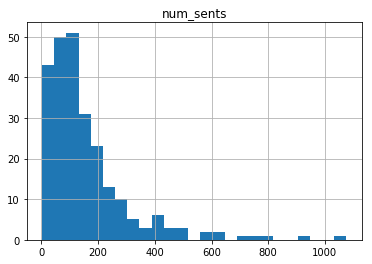

In [8]:
df.hist(column='num_sents', bins=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13660ea90>]],
      dtype=object)

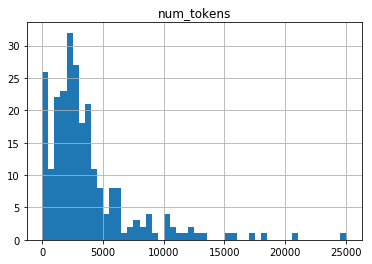

In [9]:
df.hist(column='num_tokens', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e6f17d0>]],
      dtype=object)

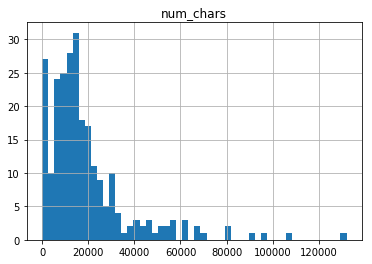

In [10]:
df.hist(column='num_chars', bins=50)

### Get POS tag counts

In [11]:
from collections import Counter
def count_noun(doc):
    c = Counter(([token.pos_ for token in doc]))
    return c['NOUN']
def count_verb(doc):
    c = Counter(([token.pos_ for token in doc]))
    return c['VERB']
def count_adj(doc):
    c = Counter(([token.pos_ for token in doc]))
    return c['ADJ']

df['nouns']=df['doc'].apply(count_noun)
df['verb']=df['doc'].apply(count_verb)
df['adj']=df['doc'].apply(count_adj)
df[['nouns','verb','adj']].head()

,nouns,verb,adj
7,50,36,8
17,202,153,77
49,55,54,20
105,497,392,156
120,315,279,108


In [12]:
def get_year(doc):
    return doc.split("_")[0]
df['year']=df['id'].apply(get_year)
df[['year']].head()

,year
7,1925
17,1925
49,1925
105,1927
120,1927


In [13]:
df['ncount'] = df.groupby('id')['year'].transform('nunique')
df[['id', 'year', 'ncount']].head()

,id,year,ncount
7,1925_X3IJOJ.txt,1925,1
17,1925_X3IV58.txt,1925,1
49,1925_X9VC5U.txt,1925,1
105,1927_X3CM82.txt,1927,1
120,1927_X3DC2D.txt,1927,1


In [14]:
def get_num_tokens(doc):
    return len(doc)

df['num_tokens'] = df['doc'].apply(get_num_tokens)

df['noun_freq'] = df['nouns'] / df['num_tokens']
df['adjective_freq'] = df['adj'] / df['num_tokens']
df['verb_freq'] = df['verb'] / df['num_tokens']

df[['year', 'noun_freq', 'adjective_freq', 'verb_freq']].head()

,year,noun_freq,adjective_freq,verb_freq
7,1925,0.234742,0.037559,0.169014
17,1925,0.147338,0.056163,0.111597
49,1925,0.181518,0.066007,0.178218
105,1927,0.184484,0.057906,0.145509
120,1927,0.183140,0.062791,0.162209


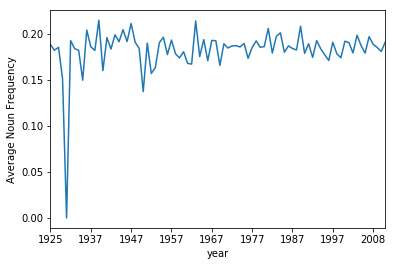

In [15]:
ax = df.groupby('year')['noun_freq'].mean().plot()
ax.set_ylabel('Average Noun Frequency')
import matplotlib.pyplot as plt
plt.show()

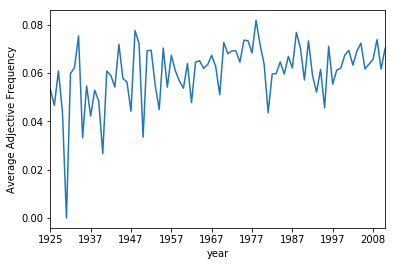

In [16]:
ax = df.groupby('year')['adjective_freq'].mean().plot()
ax.set_ylabel('Average Adjective Frequency')
plt.show()

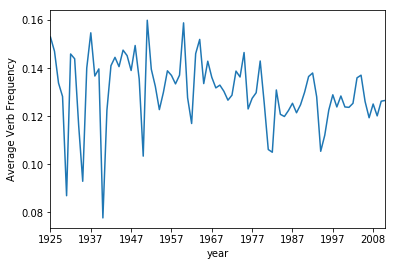

In [17]:
ax = df.groupby('year')['verb_freq'].mean().plot()
ax.set_ylabel('Average Verb Frequency')
plt.show()

### Normalize corpus

In [18]:
import string
from string import punctuation
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_corpus(doc):
    tokens = []
    for sent in doc.sents:
        sent = str(sent)
        # change carrige return
        sent = sent.replace('\r', ' ').replace('\n', ' ')
        # make everything lowercase
        lower = sent.lower() 
        # remove punctuation
        nopunc = lower.translate(None, string.punctuation)
        # split by whitespace
        words = nopunc.split() 
        # remove stopwords
        nostop = [w for w in words if w not in stoplist] 
        # normalize digits
        no_numbers = [w if not w.isdigit() else '#' for w in nostop] 
        # apply a stemmer
        stemmed = [stemmer.stem(w.decode('utf-8')) for w in no_numbers] 
        tokens += stemmed 
    return tokens
        
df['normalized_doc'] = df['doc'].apply(normalize_corpus)
df['normalized_doc'].head()

7      [per, curiam, order, appeal, plain, violat, se...
17     [van, orsdel, associ, justic, origin, proceed,...
49     [per, curiam, mccarver, socal, narcot, inspect...
105    [van, orsdel, associ, justic, appeal, decre, s...
120    [dietrich, circuit, judg, defend, plaintiff, e...
Name: normalized_doc, dtype: object

### Make a feature set of all trigrams that end in a noun

In [19]:
import nltk
terms = {}
for doc in df['normalized_doc']:
    triword =  [t for t in nltk.trigrams(doc)]
    for trigram in triword:
        (token1, token2, token3) = trigram
        if nlp(token3)[0].pos_ == 'NOUN':
            if trigram in terms:
                terms[trigram]+=1
            else:
                terms[trigram]=1
print terms

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Make a dataframe with 1000 features

In [20]:
num_features=1000
sorted_terms = sorted(terms, key=terms.get, reverse=True)[:num_features]

vocab = set(x for x in sorted_terms)
print vocab
tr = {}

cleaned_freqs = []
ids=[]
index=0
for doc in df['normalized_doc']:
    triword =  [t for t in nltk.trigrams(doc)]
    tr={}
    for trigram in triword:
        if trigram in vocab:
            if trigram in tr:
                tr[trigram]+=1
            else:
                tr[trigram]=1
    cleaned_freqs.append(tr)
    ids.append(df['id'].iloc[index])
    index+=1
    
#features = pd.DataFrame({'id':ids, "freqs":cleaned_freqs})
features = pd.DataFrame(cleaned_freqs)

features.head()

set([(u'share', u'common', u'stock'), (u'#', u'10th', u'cir'), (u'judici', u'bypass', u'option'), (u'tanley', u'w', u'arner'), (u'in', u'co', u'#'), (u'see', u'arizrevstat', u'#'), (u'district', u'court', u'instruct'), (u'corp', u'#', u'cir'), (u'#', u'usc', u'#'), (u'co', u'#', u'#'), (u'afteracquir', u'evid', u'doctrin'), (u'appeal', u'second', u'circuit'), (u'#', u'suprem', u'court'), (u'dismiss', u'district', u'court'), (u'decis', u'tax', u'court'), (u'amend', u'unit', u'state'), (u'5th', u'cir', u'#'), (u'provis', u'section', u'#'), (u'#', u'intern', u'revenu'), (u'ration', u'relat', u'legitim'), (u'#', u'wl', u'#'), (u'cash', u'surrend', u'valu'), (u'januari', u'#', u'#'), (u'see', u'#', u'cfr'), (u'permiss', u'exposur', u'limit'), (u'div', u'#', u'#'), (u'ca', u'#', u'#'), (u'relat', u'legitim', u'state'), (u'#', u'#', u'usca'), (u'see', u'eg', u'unit'), (u'collect', u'bargain', u'contract'), (u'state', u'district', u'court'), (u'hold', u'district', u'court'), (u'irrevoc', u'set

,"(#, #, #)","(#, #, a2d)","(#, #, accord)","(#, #, act)","(#, #, addit)","(#, #, affirm)","(#, #, alr)","(#, #, appeal)","(#, #, appli)","(#, #, bankr)",...,"(wl, #, #)","(woman, abort, decis)","(worker, compens, act)","(would, entitl, relief)","(writ, habea, corpus)","(year, #, #)","(year, discharg, debt)","(york, casualti, compani)","(york, time, co)","(¶, #, #)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# fillna
features.fillna(0,inplace=True)
# normalize features to unit variance
normalized_df=features/features.std()
normalized_df.head()

,"(#, #, #)","(#, #, a2d)","(#, #, accord)","(#, #, act)","(#, #, addit)","(#, #, affirm)","(#, #, alr)","(#, #, appeal)","(#, #, appli)","(#, #, bankr)",...,"(wl, #, #)","(woman, abort, decis)","(worker, compens, act)","(would, entitl, relief)","(writ, habea, corpus)","(year, #, #)","(year, discharg, debt)","(york, casualti, compani)","(york, time, co)","(¶, #, #)"
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.200704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.401408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.475906,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Link to reverse doc

In [22]:
import csv
with open('RobotJudge/PS1/case_reversed.csv', mode='r') as infile:
    reader = csv.reader(infile)

    reversed_dict = dict((rows[0],rows[1]) for rows in reader)

In [23]:
def add_reversed(doc):
    return reversed_dict[doc.split("_")[1].split(".")[0]]

df['reversed']=df['id'].apply(add_reversed)
df[['reversed']].head()

,reversed
7,0
17,1
49,0
105,0
120,0


### Create training and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, df['reversed'], test_size=0.2)

### Train a model to predict whether the case was reversed

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
log_reg.score(X_test, y_test)

0.46

In [27]:
log_reg.score(X_train, y_train)

0.99

In [28]:
from sklearn.metrics import accuracy_score, f1_score
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)
print "Accuracy train"
print accuracy_score(y_train, y_pred_train, normalize=True)
print "Accuracy test"
print accuracy_score(y_test, y_pred_test, normalize=True)
print "F1 train"
print f1_score(y_train, y_pred_train, average="macro")
print "F1 test"
print f1_score(y_test, y_pred_test, average="macro")

Accuracy train
0.99
Accuracy test
0.46
F1 train
0.9887779149365952
F1 test
0.44191814799503926


In [29]:
print log_reg.get_params()
print X_train.shape
print y_train.shape

{'warm_start': False, 'C': 1.0, 'n_jobs': None, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'warn', 'random_state': None, 'dual': False, 'tol': 0.0001, 'solver': 'warn', 'class_weight': None}
(200, 1000)
(200,)


### Choose best parameters

In [30]:
params = {'C':[.1,1,10,11], 'penalty':['l2', 'l1']}
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(log_reg,params,n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
log_reg = grid.best_estimator_


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'penalty': 'l1', 'C': 0.1}


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Compute ROC and AUC

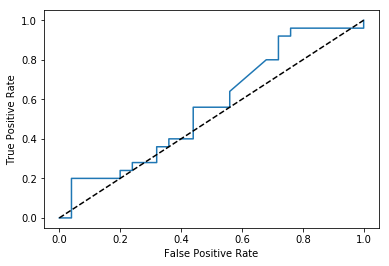

In [31]:
import numpy as np
%matplotlib inline
#log_reg.set_params(C=0.1, penalty='l1') # already set
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)
dec=log_reg.decision_function(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, dec, pos_label="0")
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
from sklearn import metrics
metrics.auc(fpr, tpr)

0.5631999999999999

### Create df which each sentence as a doc

In [18]:
new_df=[]
for doc in df['doc']:
    for sent in doc.sents:
        new_df.append([str(sent)])

#print new_df
df_sent = pd.DataFrame(new_df, columns=['sents'])
df_sent.head()

,sents
0,PER CURIAM.
1,McCarver was a (so-called) narcotic inspector.
2,A prisoner taken by the Detroit police in a ra...
3,"An assault by one upon the other, and an affra..."
4,"McCarver was indicted, the fact issue as to in..."


### Compute sentiment scores

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def sentiment_pos(sent):
    return sid.polarity_scores(str(sent))['pos']
def sentiment_neg(sent):
    return sid.polarity_scores(str(sent))['neg']

df_sent['pos']=df_sent['sents'].apply(sentiment_pos)
df_sent['neg']=df_sent['sents'].apply(sentiment_neg)
df_sent[['pos', 'neg']].head()


,pos,neg
0,0.000,0.000
1,0.000,0.000
2,0.091,0.093
3,0.000,0.485
4,0.000,0.224


### Find sentences with the most positive sentiment

In [7]:
# Sort the dataframe by pos values
df_sent=df_sent.sort_values(by=['pos'], ascending=False)
df_sent[['pos', 'sents']].head(10)

,pos,sents
5590,1.000,Yes.
2124,1.000,"Yes. """
39088,0.773,Liberty Univ.
33387,0.767,remains strong.
34026,0.762,Managed Care
32474,0.752,FAIR Br.
32463,0.740,The Supreme Court agreed.
31631,0.730,"Yes, sir."
1106,0.730,"Yes, sir. """
31681,0.730,"Yes, sir."


### Find sentences with the most negative sentiment

In [36]:
# Sort the dataframe by neg values
df_sent=df_sent.sort_values(by=['neg'], ascending=False)
df_sent[['neg', 'sents']].head(10)

,neg,sents
3048,1.0,No.
433,1.0,No.
436,1.0,No.
36887,1.0,182 )
423,1.0,No.
425,1.0,No.
20456,1.0,No.
409,1.0,No.
17468,1.0,No.
3264,1.0,No.


### Compute tfidf features

In [31]:
# Featurize the data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.001, # at min .01% of docs
                        max_df=0.9,  # at most 90% of docs
                        max_features=2000,
                        stop_words='english',
                        use_idf=True,
                        ngram_range=(2,3))
#tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_sent['sents'])

In [21]:
df_sent[['sents']].head()

,sents
0,PER CURIAM.
1,McCarver was a (so-called) narcotic inspector.
2,A prisoner taken by the Detroit police in a ra...
3,"An assault by one upon the other, and an affra..."
4,"McCarver was indicted, the fact issue as to in..."


In [32]:
X = X.toarray()

### Compute cosine similarities between sentences

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(X)

In [35]:
# Get the indices of the similarity matrix for the sorted values
idx = np.argsort(sims, axis=None)[::-1]
rows, cols = np.unravel_index(idx, sims.shape)

a_sorted = sims[rows, cols]

In [36]:
print a_sorted
print rows
print cols

[1. 1. 1. ... 0. 0. 0.]
[1519  136 5166 ... 4069 4069    0]
[1475  136 5166 ...   67   68    0]


### Print pairs of similar sentences based on tfidf features

In [42]:
toprint=10
used_sentences=[]
for k in range(0, len(a_sorted)):
    if toprint>0 and rows[k]!=cols[k]: # make sure you're not prinitng the same sent as that has the highest score
        toprint-=1
        print "A very similar pair:"
        print df_sent['sents'][rows[k]]
        print df_sent['sents'][cols[k]]
        print rows[k]
        print cols[k]
        used_sentences.append(rows[k])
        used_sentences.append(cols[k])
    elif toprint==0:
        break
        

A very similar pair:
That the United States had a legitimate proprietary interest in insuring the disposal of its surplus materials to veterans in accordance with the announced policy and objectives of the Surplus Property Act, and that it suffered compensable damage under the statute by defendants' manifest perversion of that policy are propositions which have been settled beyond the need for further review.
(1) of the Surplus Property Act created a statutory right in the United States to recover liquidated damages which were thought by the Court to be reasonable, we believe that the Court intended to put at rest the "asserted" conflict between the circuits.
1519
1475
A very similar pair:
It is contended that the opinion of the Supreme Court in United States v. Zucca , 351 U.S. 91 , 76 S.Ct.
It is earnestly contended that the Supreme Court of the United States, and this court, have repeatedly held that the ordinances of a municipality, passed in the exercise of a power delegated to it

### Print pairs of dissimilar sentences based on tfidf features

In [45]:
toprint=3
used_sentences=[]
for k in range(0, len(a_sorted)):
    if toprint>0:
        toprint-=1
        print "A very dissimilar pair:"
        print df_sent['sents'][rows[len(a_sorted)-k-1]]
        print df_sent['sents'][cols[len(a_sorted)-k-1]]
        used_sentences.append(rows[len(a_sorted)-k-1])
        used_sentences.append(cols[len(a_sorted)-k-1])
    elif toprint==0:
        break

A very dissimilar pair:
33 F.3d 774, 777 (7th Cir.1994).
App.
A very dissimilar pair:
33 F.3d 774, 777 (7th Cir.1994).
750, 763 , 64 S. E. 807 ; Royal Indemnity Co. v. Schwartz (Tex. Civ.
A very dissimilar pair:
33 F.3d 774, 777 (7th Cir.1994).
App.


### Use k-means clustering to assign the sentences into 20 clusters.

In [39]:
from sklearn.cluster import KMeans
num_clusters = 20
km = KMeans(n_clusters=num_clusters,n_jobs=-1)
km.fit(X)

doc_clusters = km.labels_.tolist()
df_sent['cluster'] = doc_clusters

### List 5 sentences from each cluster

In [40]:
for c in range(0, 20):
    print "Cluster number:" + str(c)
    print df_sent[df_sent['cluster']==c]['sents'][0:5]


Cluster number:0
0                                          PER CURIAM.
1       McCarver was a (so-called) narcotic inspector.
3    An assault by one upon the other, and an affra...
4    McCarver was indicted, the fact issue as to in...
5    The only exception taken was to part of the ch...
Name: sents, dtype: object
Cluster number:1
5014    To ensure equality, the state calculates the m...
5015    15-947 , and then pays the difference between ...
5019    The revenue control limit, and hence the distr...
5020    15-945 , and "base support" funds, see ARIZ.RE...
5028                                   See ARIZ.REV.STAT.
Name: sents, dtype: object
Cluster number:2
757     On Jan. 10, 1949, discharge was sought by habe...
810     The district court on habeas corpus properly r...
824     This remedy is much better adapted to reach ju...
942     If then the Security Bank case is not an autho...
1010    We think the District Court was correct in ove...
Name: sents, dtype: object
Cluster numbe